In [1]:
from keras.layers import Dense, Input
from keras.layers import Conv1D, Flatten, Lambda
from keras.layers import Reshape, UpSampling1D
from keras.models import Model
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Using TensorFlow backend.


In [77]:
x_all = np.load('x_sigs.npy')
fx = np.load('features.npy')
y_b = np.load('y_mc.npy')

# binary class labels
# for later cases, using only class 0 for 0, and all other classes as 1
y_b[y_b<=0] = 0
y_b[y_b>=1] = 1

In [78]:
x_all.shape

(1000, 905)

In [79]:
fx.shape

(1000, 10)

In [80]:
y_b.shape

(1000,)

In [81]:
x_aug = np.load('Xs_aug.npy')
fx_aug = np.load('Xf_aug.npy')
y_aug = np.load('y_aug.npy')

In [82]:
x_aug.shape

(800, 905, 1)

In [83]:
x_aug = x_aug[-50:,:,:]

In [84]:
x_aug = np.reshape(x_aug, (50, 905))

In [85]:
x_aug.shape

(50, 905)

In [86]:
fx_aug.shape

(800, 10)

In [87]:
fx_aug = fx_aug[-50:,:]

In [88]:
fx_aug.shape

(50, 10)

In [89]:
y_aug.shape

(800,)

In [90]:
y_aug = y_aug[-50:,]

In [91]:
y_aug.shape

(50,)

In [92]:
y_aug

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [93]:
x_all = np.concatenate((x_all, x_aug), axis = 0)

In [94]:
x_all.shape

(1050, 905)

In [95]:
fx = np.concatenate((fx, fx_aug), axis = 0)

In [96]:
fx.shape

(1050, 10)

In [97]:
y_b = np.concatenate((y_b, y_aug), axis = 0)

In [98]:
y_b.shape

(1050,)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(fx)
print(scaler.mean_)
fx = scaler.transform(fx)

print(np.mean(fx))
print(np.std(fx))

scaler = StandardScaler()
scaler.fit(x_all)
print(scaler.mean_)
x_all = scaler.transform(x_all)

print(np.mean(x_all))
print(np.std(x_all))

# train, test  == stratified
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(fx, y_b)

print(sss)       

for train_index, test_index in sss.split(fx, y_b):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xs_train, Xf_train, Xs_test, Xf_test = x_all[train_index], fx[train_index], x_all[test_index], fx[test_index]
    y_train, y_test = y_b[train_index], y_b[test_index]
    
    
print(Xs_train.shape)
print(Xf_train.shape)
print(Xs_test.shape)
print(Xf_test.shape)

[3.25362262e+09 5.05698927e+04 1.83679572e+03 2.69776884e+04
 1.51470377e-01 2.32846075e+00 1.54156457e+00 1.79779301e+06
 2.17585754e+04 2.98425756e+01]
-5.413658939124573e-17
1.0000000000000002
[1847.18300896 1847.37135325 1847.05877853 1847.24672399 1847.51090507
 1846.27153128 1843.77220248 1842.88928133 1840.97111381 1837.53809794
 1835.88317836 1835.35883729 1832.89841928 1836.32703679 1840.62771912
 1843.42540188 1848.37911154 1848.11294929 1845.75746079 1845.83312391
 1850.32407995 1855.98804317 1855.72918478 1852.30444526 1849.98728375
 1849.64148369 1847.5087788  1843.24338446 1842.34087518 1838.28448109
 1837.25375805 1843.49494536 1847.99723917 1846.05040262 1844.93333153
 1844.55659326 1840.69982959 1839.41432551 1842.05633513 1842.74226129
 1842.64586231 1845.12591015 1848.17425473 1850.33159461 1854.31089183
 1852.69627288 1844.99283678 1839.96064784 1835.65085292 1834.97830959
 1837.8362868  1843.62516996 1847.4733598  1846.74379073 1844.27704884
 1844.04811878 1842.756

In [101]:
Xs_train = np.reshape(Xs_train, (840,905,1))
print(Xs_train.shape)

Xs_test = np.reshape(Xs_test, (210,905,1))
print(Xs_test.shape)

(840, 905, 1)
(210, 905, 1)


In [102]:
import keras
from keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [103]:
import math
def step_decay(epoch, triangular = False):
    initial_lrate = 0.1
    drop = 0.7
    epochs_drop = 3.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if triangular == True and epoch%2 == 1:
        lrate += lrate
    return lrate

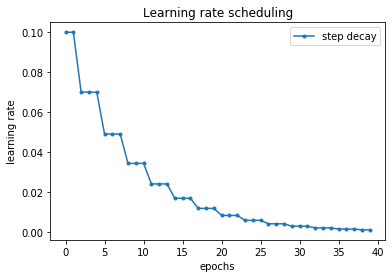

In [104]:
import matplotlib.pyplot as plt
y = [step_decay(x) for x in range(40)]
#print(y)
plt.plot(y, '.-')
#plt.plot(y_tri, '.-k')
plt.title('Learning rate scheduling')
plt.xlabel('epochs')
plt.ylabel('learning rate')
plt.legend(['step decay'])
plt.savefig('learning_rate.png', dpi=1000)
plt.show()

In [105]:
from keras.models import Model
from keras.layers import LSTM, CuDNNLSTM, Dense, Dropout, Input, ConvLSTM2D, Flatten, Add, Concatenate, Dot, Multiply
from keras.layers import Maximum, Average, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import math


lrate = LearningRateScheduler(step_decay)

neurons = (2<<5) - 1

t_len = 905
n_class = 2


x_i = Input(shape = (905,1))
x_i2 = Input(shape = (10,))

# bf
x = CuDNNLSTM(units=neurons, return_sequences = True, kernel_initializer = keras.initializers.he_normal(seed=19),
        recurrent_initializer = keras.initializers.he_normal(seed=19), kernel_regularizer = keras.regularizers.l1(0.01),
        recurrent_regularizer = keras.regularizers.l2(0.01))(x_i)
x = Dropout(0.4)(x)

#b1
x_pa = CuDNNLSTM(units=neurons, kernel_initializer = keras.initializers.he_normal(seed=19),
        recurrent_initializer = keras.initializers.he_normal(seed=19), kernel_regularizer = keras.regularizers.l1(0.01),
        recurrent_regularizer = keras.regularizers.l2(0.01))(x)
x = Activation('relu')(x_pa)
x = Dropout(0.1)(x)

#b2
x_pa2 = Dense(neurons, kernel_initializer = keras.initializers.he_normal(seed=19),
             bias_initializer = keras.initializers.he_normal(seed=19),
             kernel_regularizer = keras.regularizers.l1(0.01),
             bias_regularizer = keras.regularizers.l1(0.01))(x_i2)
x2 = Activation('relu')(x_pa2)
x2 = Dropout(0.1)(x2)
x_dot = Dot(axes=1, normalize=True)([x2, x]) 

# Dot gives 75% test axes=1, normalize=True
# Add 33% Mul got stuck at 75% Max got stuck 70%
# Average stuck 70%

x_add = Concatenate()([x_dot, x_pa])
x_f = Activation('relu')(x_add)

x_add2 = Concatenate()([x_dot, x_pa2])
x_f2 = Activation('relu')(x_add2)

x_dot2 = Dot(axes=1, normalize=True)([x_f, x_f2])

x_add = Concatenate()([x_dot2, x_pa])
x_f = Activation('relu')(x_add)

x_add2 = Concatenate()([x_dot2, x_pa2])
x_f2 = Activation('relu')(x_add2)

x_dot3 = Dot(axes=1, normalize=True)([x_f, x_f2])

x_add = Concatenate()([x_dot3, x_pa])
x_f = Activation('relu')(x_add)

x_add2 = Concatenate()([x_dot3, x_pa2])
x_f2 = Activation('relu')(x_add2)

x_dot4 = Dot(axes=1, normalize=True)([x_f, x_f2])

x_add = Concatenate()([x_dot4, x_pa])
x_f = Activation('relu')(x_add)

x_add2 = Concatenate()([x_dot4, x_pa2])
x_f2 = Activation('relu')(x_add2)

x_dot5 = Dot(axes=1, normalize=True)([x_f, x_f2])

x_add = Concatenate()([x_dot5, x_i2])
x_f = Activation('relu')(x_add)

x_f = Dense(128, activation='relu', kernel_initializer = keras.initializers.he_normal(seed=19),
             bias_initializer = keras.initializers.he_normal(seed=19),
             kernel_regularizer = keras.regularizers.l1(0.01),
             bias_regularizer = keras.regularizers.l1(0.01))(x_f)


x = Dropout(0.2)(x_f)
x_o = Dense(n_class, activation='softmax')(x)


model = Model([x_i, x_i2], x_o)

# checkpoint
filepath="dot_res_lstm-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, lrate]

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [106]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 905, 1)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)        (None, 905, 63)      16632       input_7[0][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 905, 63)      0           cu_dnnlstm_3[0][0]               
__________________________________________________________________________________________________
dense_7 (D

In [112]:
hist = model.fit([Xs_train, Xf_train], y_train, epochs = 100, batch_size = 64, validation_data=([Xs_test, Xf_test], y_test),
        callbacks=callbacks_list)

Train on 840 samples, validate on 210 samples
Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.2784 - acc: 0.7583 - val_loss: 2.4965 - val_acc: 0.7571

Epoch 00001: val_acc did not improve from 0.77619
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 2.5235 - acc: 0.7619 - val_loss: 2.3869 - val_acc: 0.7667

Epoch 00002: val_acc did not improve from 0.77619
Epoch 3/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3543 - acc: 0.7679 - val_loss: 1.9938 - val_acc: 0.7619

Epoch 00003: val_acc did not improve from 0.77619
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 2.0412 - acc: 0.7500 - val_loss: 2.1205 - val_acc: 0.7143

Epoch 00004: val_acc did not improve from 0.77619
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 2.1101 - acc: 0.7488 - val_loss: 1.9919 - val_acc: 0.7762

Epoch 00005: val_acc did not improve from 0.77619
Epoch 6/100
840/840 [=============

840/840 [==============================] - 2s 2ms/step - loss: 0.5368 - acc: 0.7714 - val_loss: 0.5313 - val_acc: 0.7810

Epoch 00044: val_acc did not improve from 0.79524
Epoch 45/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5287 - acc: 0.7738 - val_loss: 0.5259 - val_acc: 0.7810

Epoch 00045: val_acc did not improve from 0.79524
Epoch 46/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5269 - acc: 0.7774 - val_loss: 0.5254 - val_acc: 0.7810

Epoch 00046: val_acc did not improve from 0.79524
Epoch 47/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5385 - acc: 0.7655 - val_loss: 0.5247 - val_acc: 0.7810

Epoch 00047: val_acc did not improve from 0.79524
Epoch 48/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5228 - acc: 0.7690 - val_loss: 0.5216 - val_acc: 0.7810

Epoch 00048: val_acc did not improve from 0.79524
Epoch 49/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5289 - acc

840/840 [==============================] - 2s 2ms/step - loss: 0.5151 - acc: 0.7714 - val_loss: 0.5153 - val_acc: 0.7810

Epoch 00088: val_acc did not improve from 0.79524
Epoch 89/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5205 - acc: 0.7738 - val_loss: 0.5153 - val_acc: 0.7810

Epoch 00089: val_acc did not improve from 0.79524
Epoch 90/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5257 - acc: 0.7726 - val_loss: 0.5153 - val_acc: 0.7810

Epoch 00090: val_acc did not improve from 0.79524
Epoch 91/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5191 - acc: 0.7726 - val_loss: 0.5153 - val_acc: 0.7810

Epoch 00091: val_acc did not improve from 0.79524
Epoch 92/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5166 - acc: 0.7714 - val_loss: 0.5153 - val_acc: 0.7810

Epoch 00092: val_acc did not improve from 0.79524
Epoch 93/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5243 - acc

In [108]:
Xs_test_t = np.load('Xs_test.npy')
Xf_test_t = np.load('Xf_test.npy')
y_test_t = np.load('y_test.npy')

In [110]:
model.evaluate([Xs_test_t, Xf_test_t], y_test_t)

200/200 [==============================] - 0s 2ms/step


[0.956279878616333, 0.685]

In [111]:
model.evaluate([Xs_test, Xf_test], y_test)

210/210 [==============================] - 0s 2ms/step


[0.5972099741299947, 0.7714285731315613]

In [113]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = model.predict([Xs_test, Xf_test])
y_pred = y_pred.argmax(axis=-1)
y_true = y_b[test_index]
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.7743589743589744, 0.9869281045751634, 0.867816091954023, None)